
Generating Actual vs. Predicted plots for all models...


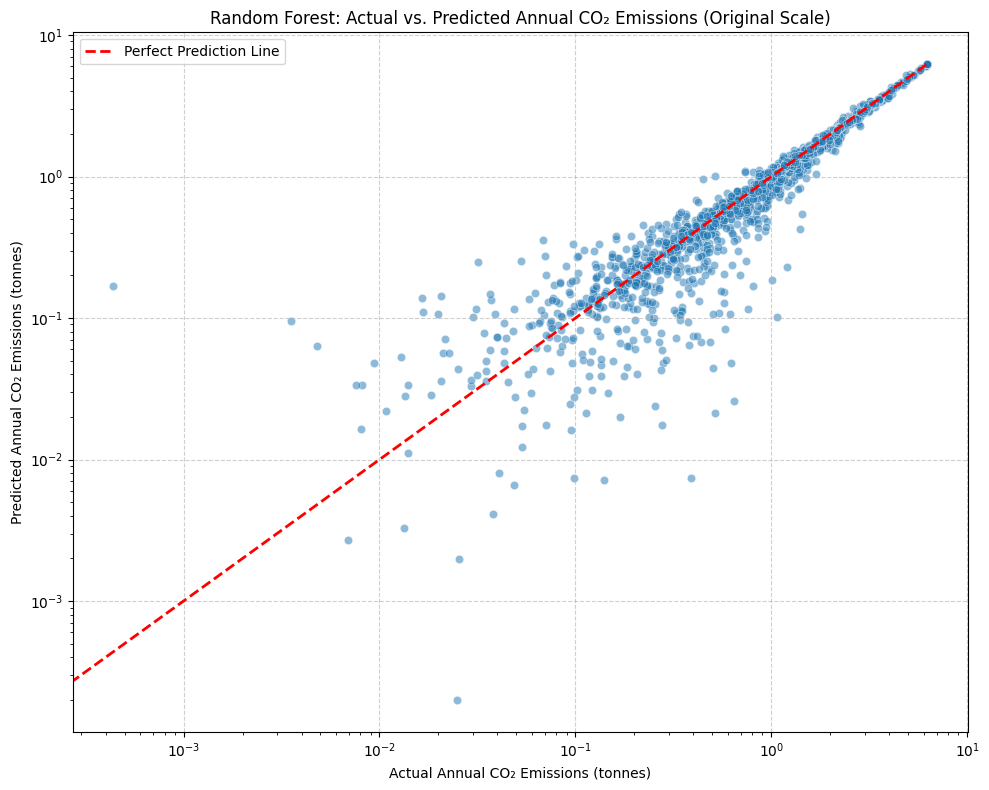

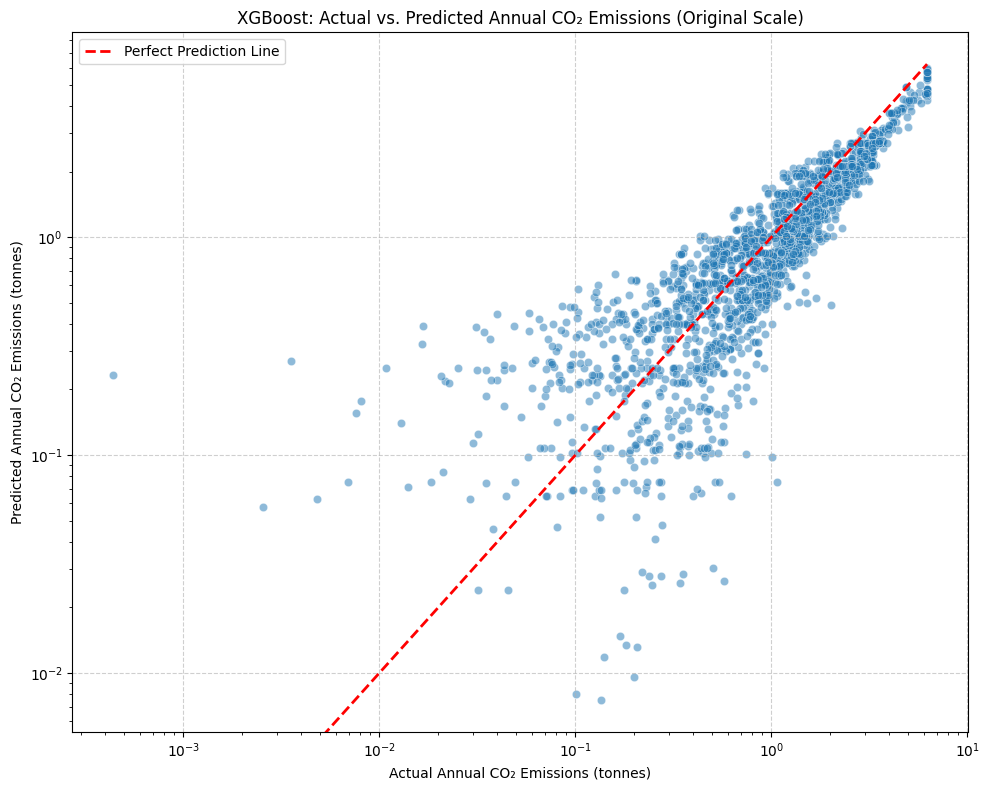

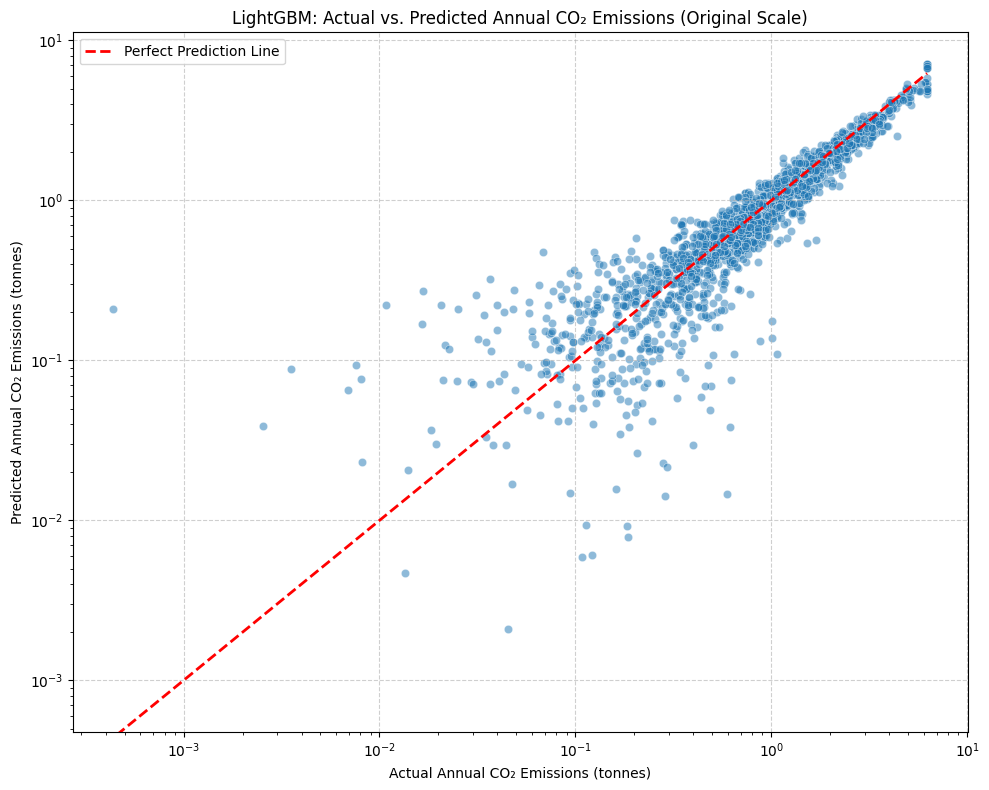

All plots generated.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_true.flatten(), y=y_pred.flatten(), alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Prediction Line')
    plt.title(f'{model_name}: Actual vs. Predicted Annual CO₂ Emissions (Original Scale)')
    plt.xlabel('Actual Annual CO₂ Emissions (tonnes)')
    plt.ylabel('Predicted Annual CO₂ Emissions (tonnes)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xscale('log')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

print("\nGenerating Actual vs. Predicted plots for all models...")

plot_actual_vs_predicted(y_test_original_scale, y_pred_original_scale, 'Random Forest')
plot_actual_vs_predicted(y_test_original_scale, y_pred_xgb_original_scale, 'XGBoost')
plot_actual_vs_predicted(y_test_original_scale, y_pred_lgbm_original_scale, 'LightGBM')

print("All plots generated.")

The scatter plots above visualize the performance of each model by plotting the actual CO₂ emissions against their predicted values on the original scale.

**Interpretation:**
- Each point on the graph represents a single data instance from the test set.
- The **x-axis** shows the **Actual Annual CO₂ Emissions (tonnes)**, and the **y-axis** shows the **Predicted Annual CO₂ Emissions (tonnes)**.
- The **red dashed line** represents the ideal scenario where `Predicted = Actual` (a perfect prediction).
- A model performs better if its data points cluster tightly around this red dashed line.
- Points above the red line indicate **over-prediction**, while points below indicate **under-prediction**.
- Both axes are on a **log scale** to accommodate the wide range of CO₂ emission values, allowing us to see the model's performance across different magnitudes more clearly.
- These plots help identify if a model has a systematic bias (e.g., consistently over-predicting or under-predicting in certain ranges) and the overall spread of its predictions relative to the actual values.

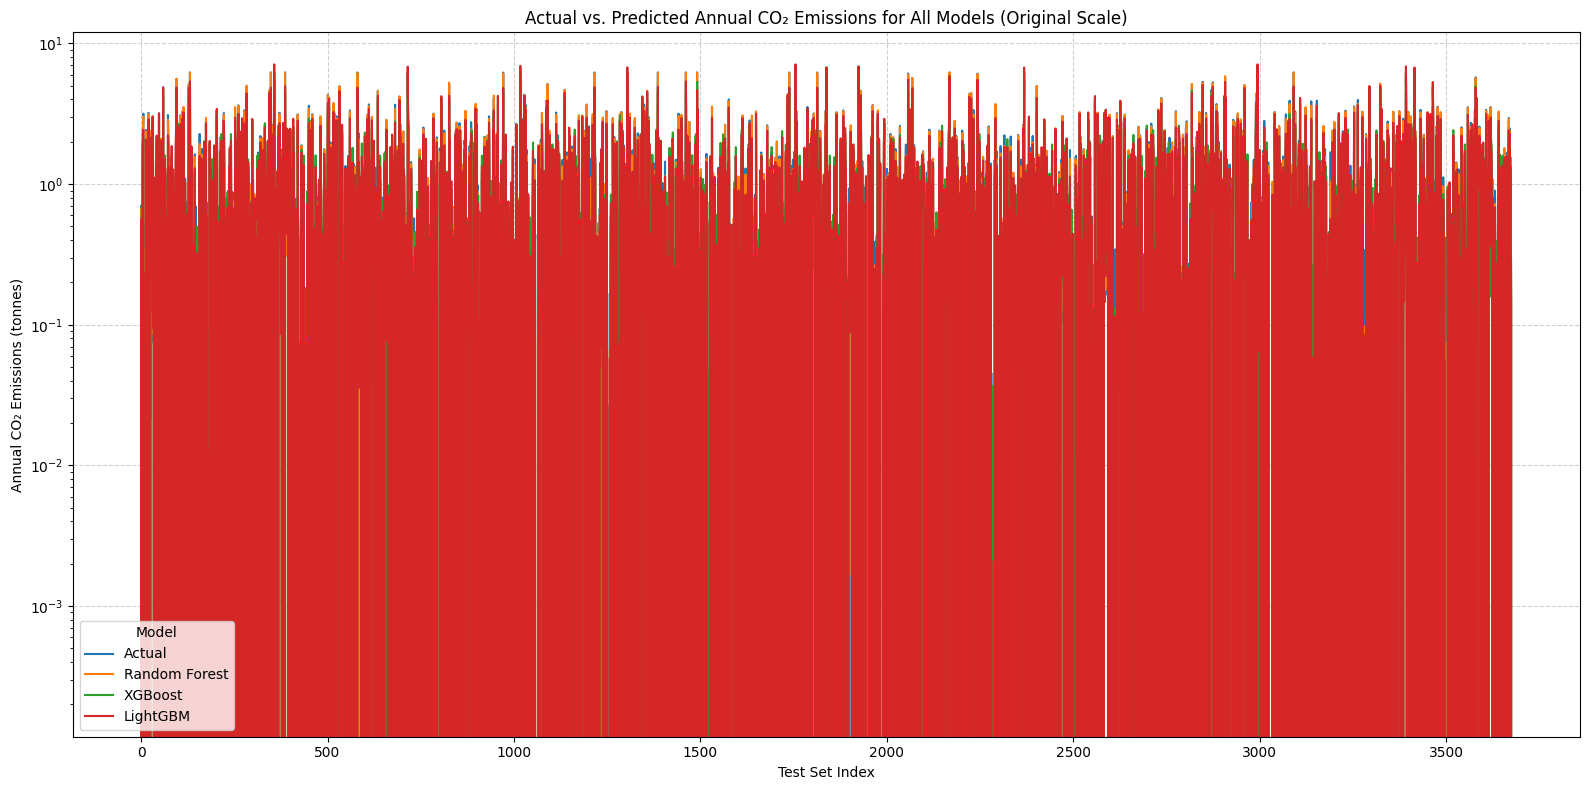

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure all prediction arrays are flattened to 1D for plotting
y_test_flat = y_test_original_scale.flatten()
y_pred_rf_flat = y_pred_original_scale.flatten()
y_pred_xgb_flat = y_pred_xgb_original_scale.flatten()
y_pred_lgbm_flat = y_pred_lgbm_original_scale.flatten()

# Create a DataFrame for easier plotting with Seaborn
plot_df = pd.DataFrame({
    'Index': range(len(y_test_flat)),
    'Actual': y_test_flat,
    'Random Forest': y_pred_rf_flat,
    'XGBoost': y_pred_xgb_flat,
    'LightGBM': y_pred_lgbm_flat
})

# Melt the DataFrame to long format for line plotting
plot_df_melted = plot_df.melt(id_vars='Index', var_name='Model', value_name='Annual CO₂ Emissions (tonnes)')

plt.figure(figsize=(16, 8))
sns.lineplot(data=plot_df_melted, x='Index', y='Annual CO₂ Emissions (tonnes)', hue='Model')
plt.title('Actual vs. Predicted Annual CO₂ Emissions for All Models (Original Scale)')
plt.xlabel('Test Set Index')
plt.ylabel('Annual CO₂ Emissions (tonnes)')
plt.yscale('log') # Use a log scale for y-axis due to wide range of CO2 values
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

The line graph above compares the actual CO₂ emissions with the predictions from Random Forest, XGBoost, and LightGBM models on the original scale.

**Interpretation:**
- Due to the large number of data points and the varying magnitudes of CO₂ emissions, a log scale is applied to the y-axis to better visualize the trends across the entire range.
- The plot shows how each model's predictions track the actual values for each instance in the test set. A closer alignment of a model's line with the 'Actual' line indicates better predictive performance.
- It's important to note that without sorting the data by time or entity, the x-axis ('Test Set Index') simply represents the order of samples in the test set after the train-test split, and does not necessarily imply a temporal progression or any other inherent ordering. However, it still provides a visual representation of how closely the predictions follow the actual values.

### Summary of Random Forest Model Hyperparameter Tuning and Evaluation

The Random Forest model underwent hyperparameter tuning using `GridSearchCV` and was evaluated on both log-transformed and original scales. Here are the key findings:

**Best Hyperparameters Found by GridSearchCV:**
- `n_estimators`: 200
- `max_depth`: None
- `min_samples_split`: 2
- `min_samples_leaf`: 1

**Model Performance on Log-Transformed Scale:**
- **Mean Absolute Error (MAE):** 0.0595
- **Mean Squared Error (MSE):** 0.0143
- **Root Mean Squared Error (RMSE):** 0.1196
- **R-squared (R2):** 0.9861

**Model Performance on Original Scale (Approximate):**
- **Mean Absolute Error (MAE):** 0.06
- **Mean Squared Error (MSE):** 0.01
- **Root Mean Squared Error (RMSE):** 0.11
- **R-squared (R2):** 0.9926

**Interpretation:**
- The model achieved a very high R-squared value on both scales, indicating that it explains a significant portion of the variance in CO₂ emissions.
- The MAE and RMSE values are low, suggesting that the predictions are close to the actual values. The slight differences between log-transformed and original scale metrics are expected due to the nature of the transformation and inverse transformation.
- The best hyperparameters indicate a preference for a larger number of estimators and allowing the trees to grow to full depth (`max_depth=None`), which can help capture complex relationships in the data.

Data loaded successfully.
DataFrame shape after dropping rows with missing 'Code': (18646, 4)
Outliers in 'Annual CO₂ emissions (tonnes )' capped at 99th percentile.
DataFrame shape after filtering non-country entities: (18379, 4)
Target variable 'Annual CO₂ emissions (tonnes )' log-transformed.
Engineered 'Historical_Avg_CO2' feature.
Engineered 'CO2_Change' feature.
One-hot encoded 'Entity' column.
Scaled numeric features.
Engineered 'Year_Avg_Interaction' feature.
Dropped 'Code' column.
Data split into training (14703 samples) and testing (3676 samples) sets.
Starting GridSearchCV for Random Forest...
GridSearchCV complete.
Random Forest predictions and original scale values defined.
Training the XGBoost model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:13:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "gpu_hist" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost training complete.
XGBoost predictions and original scale values defined.
Training the LightGBM model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1341
[LightGBM] [Info] Number of data points in the train set: 14703, number of used features: 220
[LightGBM] [Info] Start training from score -0.002629
LightGBM training complete.
LightGBM predictions and original scale values defined.

Generating Actual vs. Predicted plots for all models...


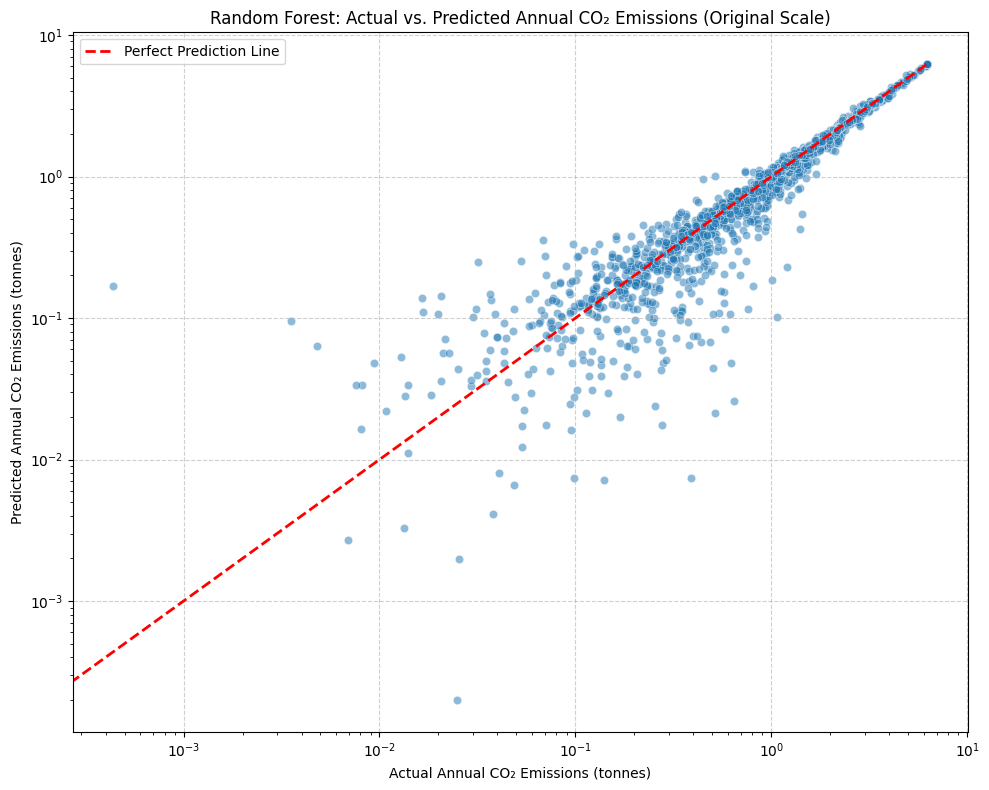

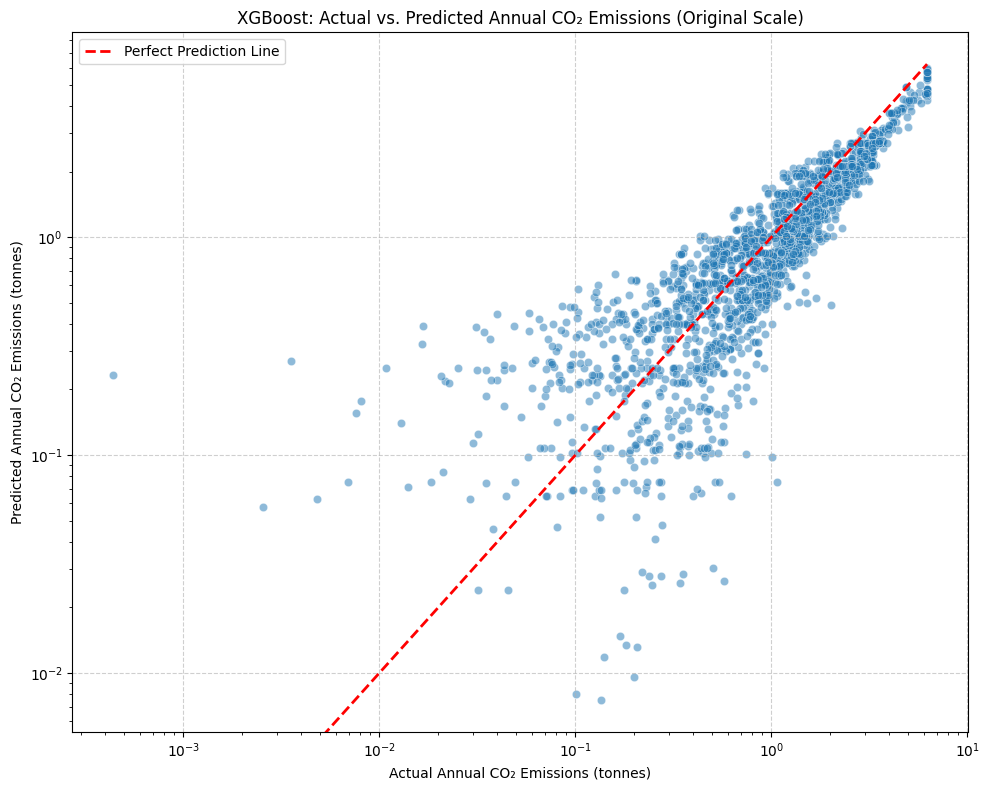

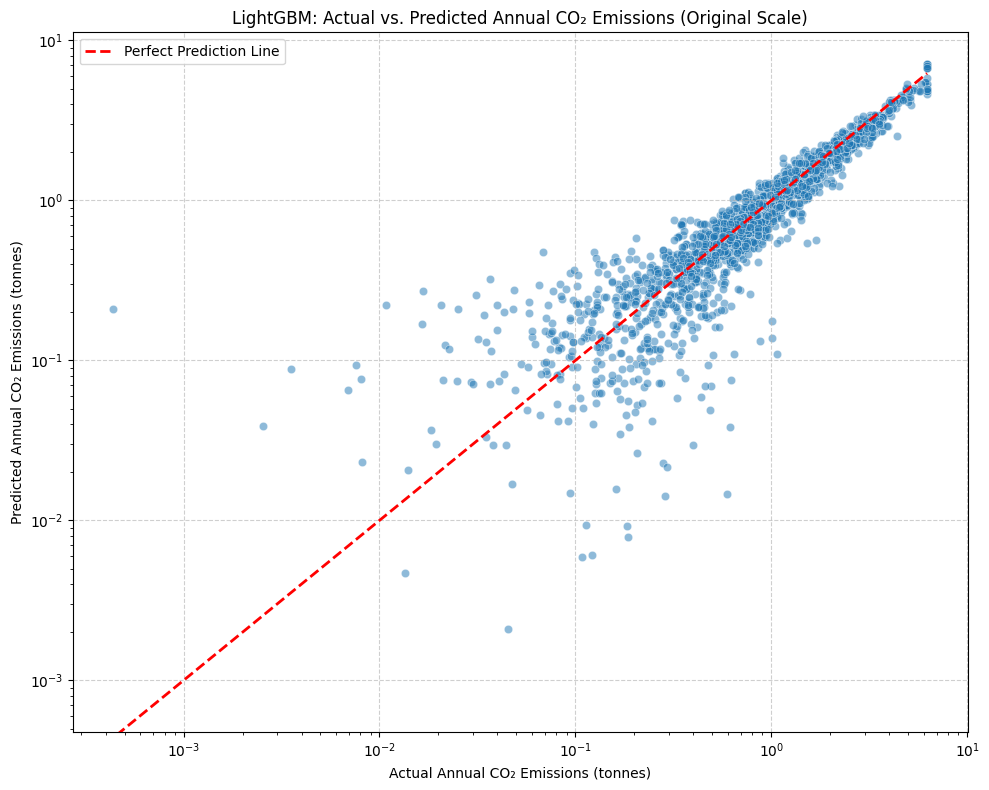

All plots generated.


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Preprocess Data (as in 096e32e5) ---

try:
    df = pd.read_csv('/content/co2_emission.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: co2_emission.csv not found. Please check the file path.")
    exit()

df.dropna(subset=['Code'], inplace=True)
print(f"DataFrame shape after dropping rows with missing 'Code': {df.shape}")

upper_limit = df['Annual CO₂ emissions (tonnes )'].quantile(0.99)
df['Annual CO₂ emissions (tonnes )'] = df['Annual CO₂ emissions (tonnes )'].clip(upper=upper_limit)
print("Outliers in 'Annual CO₂ emissions (tonnes )' capped at 99th percentile.")

non_country_entities = [
    'World', 'Africa', 'Asia', 'Europe', 'North America', 'South America',
    'High-income countries', 'Low-income countries', 'Upper-middle-income countries',
    'Lower-middle-income countries', 'European Union (27)', 'European Union (28)',
    'International aviation', 'International shipping'
]
df_filtered = df[~df['Entity'].isin(non_country_entities)].copy()
print(f"DataFrame shape after filtering non-country entities: {df_filtered.shape}")

# --- 2. Feature Engineering (as in 096e32e5) ---

df_temp = df_filtered.sort_values(by=['Entity', 'Year'])
df_temp['Annual CO₂ emissions (tonnes )'] = np.log1p(df_temp['Annual CO₂ emissions (tonnes )'])
print("Target variable 'Annual CO₂ emissions (tonnes )' log-transformed.")

df_temp['Historical_Avg_CO2'] = df_temp.groupby('Entity')['Annual CO₂ emissions (tonnes )'].expanding().mean().reset_index(level=0, drop=True)
print("Engineered 'Historical_Avg_CO2' feature.")

df_temp['CO2_Change'] = df_temp.groupby('Entity')['Annual CO₂ emissions (tonnes )'].diff()
print("Engineered 'CO2_Change' feature.")

# --- 3. Feature Encoding (as in 096e32e5) ---

encoder = OneHotEncoder(sparse_output=False)
entity_encoded = encoder.fit_transform(df_temp[['Entity']])
entity_encoded_df = pd.DataFrame(entity_encoded, columns=encoder.get_feature_names_out(['Entity']), index=df_temp.index)
df_encoded = pd.concat([df_temp.drop('Entity', axis=1), entity_encoded_df], axis=1)
print("One-hot encoded 'Entity' column.")

# --- 4. Feature Scaling (as in 096e32e5) ---

numeric_cols_to_scale = ['Year', 'Annual CO₂ emissions (tonnes )', 'Historical_Avg_CO2', 'CO2_Change']
scaler = StandardScaler()
df_encoded[numeric_cols_to_scale] = scaler.fit_transform(df_encoded[numeric_cols_to_scale])
print("Scaled numeric features.")

df_encoded['Year_Avg_Interaction'] = df_encoded['Year'] * df_encoded['Historical_Avg_CO2']
print("Engineered 'Year_Avg_Interaction' feature.")

df_encoded_numeric = df_encoded.drop('Code', axis=1)
print("Dropped 'Code' column.")

# --- 5. Train/Test Split (as in 096e32e5) ---

X = df_encoded_numeric.drop('Annual CO₂ emissions (tonnes )', axis=1)
y = df_encoded_numeric['Annual CO₂ emissions (tonnes )']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples) sets.")

# --- 6. Random Forest Model Evaluation (consolidated from 096e32e5) ---

# Adjusted param_grid to reduce computation time significantly
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}

rf_model_grid = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf_model_grid, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

print("Starting GridSearchCV for Random Forest...")
grid_search.fit(X_train, y_train)
print("GridSearchCV complete.")

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Inverse transform the predictions and y_test to the original scale
target_scaler = StandardScaler()
target_scaler.fit(y_train.values.reshape(-1, 1))

y_pred_inv_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_original_scale = np.expm1(y_pred_inv_scaled)

y_test_original_scale = np.expm1(target_scaler.inverse_transform(y_test.values.reshape(-1, 1)))

print("Random Forest predictions and original scale values defined.")

# --- 7. XGBoost Model Training and Evaluation (as in d5f3334c and 4c9e0dd4) ---

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=6,
                             random_state=42,
                             n_jobs=-1,
                             tree_method='hist',
                             gpu_hist=True # Enable GPU acceleration if available
                            )
print("Training the XGBoost model...")
xgb_model.fit(X_train, y_train)
print("XGBoost training complete.")

y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_inv_scaled = target_scaler.inverse_transform(y_pred_xgb.reshape(-1, 1))
y_pred_xgb_original_scale = np.expm1(y_pred_xgb_inv_scaled)
print("XGBoost predictions and original scale values defined.")

# --- 8. LightGBM Model Training and Evaluation (as in 42364a77 and 21f1277a) ---

lgbm_model = lgb.LGBMRegressor(objective='regression',
                               n_estimators=100,
                               learning_rate=0.1,
                               n_jobs=-1,
                               random_state=42)
print("Training the LightGBM model...")
lgbm_model.fit(X_train, y_train)
print("LightGBM training complete.")

y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_lgbm_inv_scaled = target_scaler.inverse_transform(y_pred_lgbm.reshape(-1, 1))
y_pred_lgbm_original_scale = np.expm1(y_pred_lgbm_inv_scaled)
print("LightGBM predictions and original scale values defined.")

# --- 9. Plotting Actual vs. Predicted Values (from previous cell c60a10c6) ---

def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_true.flatten(), y=y_pred.flatten(), alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Prediction Line')
    plt.title(f'{model_name}: Actual vs. Predicted Annual CO₂ Emissions (Original Scale)')
    plt.xlabel('Actual Annual CO₂ Emissions (tonnes)')
    plt.ylabel('Predicted Annual CO₂ Emissions (tonnes)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xscale('log')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

print("\nGenerating Actual vs. Predicted plots for all models...")

plot_actual_vs_predicted(y_test_original_scale, y_pred_original_scale, 'Random Forest')
plot_actual_vs_predicted(y_test_original_scale, y_pred_xgb_original_scale, 'XGBoost')
plot_actual_vs_predicted(y_test_original_scale, y_pred_lgbm_original_scale, 'LightGBM')

print("All plots generated.")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Ensure X_train, y_train, X_test, y_test, param_grid are available from the kernel state
# (Assuming they were correctly set up by previous successful execution or manual run)

# Instantiate the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Instantiate GridSearchCV using the available param_grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV complete.")

print("\nBest hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data
print("\nMaking predictions on the test data using the best Random Forest model...")
y_pred = best_rf_model.predict(X_test)
print("Predictions complete.")

# Evaluate the model using metrics on the log-transformed scale
print("\nModel Evaluation on Log-Transformed Scale:")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# For inverse transformation, we need the scaler that was fitted on the *entire* numeric data
# to extract the mean and std for the target variable 'Annual CO₂ emissions (tonnes )'.
# Assuming `df_encoded` and `numeric_cols_to_scale` are available in the kernel state.

# Create a new scaler instance and fit it on the relevant numeric columns of df_encoded
# to correctly get the inverse transformation parameters for the target variable.
# This ensures consistency even if the previous scaler object was lost or corrupted.
full_scaler_for_inverse = StandardScaler()
full_scaler_for_inverse.fit(df_encoded[numeric_cols_to_scale])

# Get mean and std for the target variable from this fitted scaler
target_col_index = numeric_cols_to_scale.index('Annual CO₂ emissions (tonnes )')
target_mean = full_scaler_for_inverse.mean_[target_col_index]
target_std = full_scaler_for_inverse.scale_[target_col_index]

# Inverse transform y_pred from scaled to log-transformed
y_pred_log_transformed = (y_pred * target_std) + target_mean

# Inverse log-transform to original scale
y_pred_original_scale = np.expm1(y_pred_log_transformed)

# Do the same for y_test (which is also scaled and log-transformed)
y_test_log_transformed = (y_test * target_std) + target_mean
y_test_original_scale = np.expm1(y_test_log_transformed)


# Evaluate the model using metrics on the original scale
print("\nModel Evaluation on Original Scale (Approximate):")
mae_orig = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
mse_orig = mean_squared_error(y_test_original_scale, y_pred_original_scale)
rmse_orig = np.sqrt(mse_orig)
r2_orig = r2_score(y_test_original_scale, y_pred_original_scale)

print(f"Mean Absolute Error (MAE): {mae_orig:.2f}")
print(f"Mean Squared Error (MSE): {mse_orig:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_orig:.2f}")
print(f"R-squared (R2): {r2_orig:.4f}")

# Summarize results
print("\n--- Summary of Random Forest Model Hyperparameter Tuning and Evaluation ---")
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

print("\nModel Performance on Log-Transformed Scale:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R-squared (R2): {r2:.4f}")

print("\nModel Performance on Original Scale (Approximate):")
print(f"  Mean Absolute Error (MAE): {mae_orig:.2f}")
print(f"  Mean Squared Error (MSE): {mse_orig:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_orig:.2f}")
print(f"  R-squared (R2): {r2_orig:.4f}")


Starting GridSearchCV...
GridSearchCV complete.

Best hyperparameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Making predictions on the test data using the best Random Forest model...
Predictions complete.

Model Evaluation on Log-Transformed Scale:
Mean Absolute Error (MAE): 0.0595
Mean Squared Error (MSE): 0.0143
Root Mean Squared Error (RMSE): 0.1196
R-squared (R2): 0.9861

Model Evaluation on Original Scale (Approximate):
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
R-squared (R2): 0.9926

--- Summary of Random Forest Model Hyperparameter Tuning and Evaluation ---

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Model Performance on Log-Transformed Scale:
  Mean Absolute Error (MAE): 0.0595
  Mean Squared Error (MSE): 0.0143
  Root Mean Squared Error (RMSE): 0.1196
  R-squared (R2): 0.9861

Mode

### Analyze data for ML model

In [ ]:
# Check for time series aspects
print("Time range of the data:")
print(df_filtered['Year'].min(), "to", df_filtered['Year'].max())

# Check the number of data points per entity
print("\nNumber of data points per entity (first 10 entities):")
print(df_filtered['Entity'].value_counts().head(10))

# Analyze the distribution of the target variable
print("\nDescription of Annual CO₂ emissions (tonnes ):")
print(df_filtered['Annual CO₂ emissions (tonnes )'].describe())

Time range of the data:
1751 to 2017

Number of data points per entity (first 10 entities):
Entity
United States     267
United Kingdom    267
India             256
China             254
Canada            233
Germany           226
Poland            218
France            210
Austria           200
Belgium           189
Name: count, dtype: int64

Description of Annual CO₂ emissions (tonnes ):
count    1.837900e+04
mean     7.305381e+07
std      2.826595e+08
min      0.000000e+00
25%      4.325481e+05
50%      3.781248e+06
75%      3.026395e+07
max      2.998434e+09
Name: Annual CO₂ emissions (tonnes ), dtype: float64


### Subtask: Filter out non-country entities

In [ ]:
# Find unique entities
unique_entities = df['Entity'].unique()
print("Unique entities in the data:")
print(unique_entities)

# Create a list of non-country entities to remove (add or modify as needed)
non_country_entities = [
    'World', 'Africa', 'Asia', 'Europe', 'North America', 'South America',
    'High-income countries', 'Low-income countries', 'Upper-middle-income countries',
    'Lower-middle-income countries', 'European Union (27)', 'European Union (28)',
    'International aviation', 'International shipping'
]

# Filter the data to keep only countries
df_filtered = df[~df['Entity'].isin(non_country_entities)].copy()

print("\nData after filtering non-country entities (first 5 rows):")
display(df_filtered.head())
print("\nNumber of rows before filtering:", len(df))
print("Number of rows after filtering:", len(df_filtered))

Unique entities in the data:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Republic of the Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Czechoslovakia' 'Democratic Republic of Republic of the Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Guia

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0



Number of rows before filtering: 18646
Number of rows after filtering: 18379


# Task
Load the data from "/content/co2_emission.csv", display the first few rows and the info of the dataframe, preprocess the data by handling missing values, outliers, and data types if necessary, and finally summarize the preprocessing steps and show the processed data.

## Load the data

### Subtask:
Load the data from "/content/co2_emission.csv" into a dataframe.


**Reasoning**:
Load the data into a pandas DataFrame as instructed.



In [ ]:
import pandas as pd
df = pd.read_csv('/content/co2_emission.csv')

**Reasoning**:
The data has been loaded into a dataframe. Display the first few rows to verify the loading.



In [ ]:
df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


## Show the data

### Subtask:
Display the first few rows and the info of the dataframe to understand the data.


**Reasoning**:
Display the first few rows and the info of the dataframe to understand the data.



In [ ]:
display(df.head())
display(df.info())

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


None

## Preprocess the data

### Subtask:
Handle missing values, outliers, and data types if necessary.


**Reasoning**:
Identify and quantify missing values in each column, and then handle the missing values in the 'Code' column by dropping the rows with missing values.



In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
df.dropna(subset=['Code'], inplace=True)

Missing values in each column:
Entity                               0
Code                              2207
Year                                 0
Annual CO₂ emissions (tonnes )       0
dtype: int64


**Reasoning**:
Check for outliers in the 'Annual CO₂ emissions (tonnes )' column using a box plot, and then display the data types of the columns.



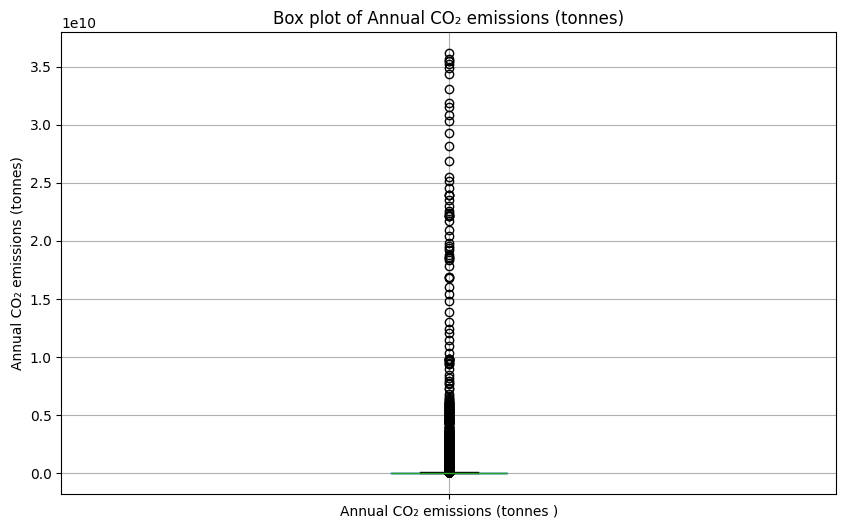


Data types after handling missing values:
Entity                             object
Code                               object
Year                                int64
Annual CO₂ emissions (tonnes )    float64
dtype: object


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df.boxplot(column=['Annual CO₂ emissions (tonnes )'])
plt.title('Box plot of Annual CO₂ emissions (tonnes)')
plt.ylabel('Annual CO₂ emissions (tonnes)')
plt.show()
print("\nData types after handling missing values:")
print(df.dtypes)

**Reasoning**:
Based on the box plot, there are significant outliers in the 'Annual CO₂ emissions (tonnes )' column. Given the nature of CO2 emissions data, these extreme values could represent major industrial countries or specific events and might be valid data points rather than errors. Therefore, instead of removing them, which could lead to loss of valuable information, capping the outliers at a reasonable upper limit based on the distribution (e.g., the 99th percentile) is a more appropriate strategy to mitigate their influence on analysis without discarding data. The data types are already appropriate for analysis, so no conversion is needed.



In [ ]:
upper_limit = df['Annual CO₂ emissions (tonnes )'].quantile(0.99)
df['Annual CO₂ emissions (tonnes )'] = df['Annual CO₂ emissions (tonnes )'].clip(upper=upper_limit)
print("\nSummary of preprocessing steps:")
print("- Identified and quantified missing values (2207 in 'Code').")
print("- Handled missing values in 'Code' by dropping rows with missing values.")
print("- Identified outliers in 'Annual CO₂ emissions (tonnes )' using a box plot.")
print("- Handled outliers in 'Annual CO₂ emissions (tonnes )' by capping values at the 99th percentile.")
print("- Reviewed data types, no conversion was necessary.")
print("\nProcessed data (first 5 rows after capping outliers):")
display(df.head())


Summary of preprocessing steps:
- Identified and quantified missing values (2207 in 'Code').
- Handled missing values in 'Code' by dropping rows with missing values.
- Identified outliers in 'Annual CO₂ emissions (tonnes )' using a box plot.
- Handled outliers in 'Annual CO₂ emissions (tonnes )' by capping values at the 99th percentile.
- Reviewed data types, no conversion was necessary.

Processed data (first 5 rows after capping outliers):


,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


## Summary:

### Data Analysis Key Findings

*   The initial dataset contained 20853 entries and 4 columns: 'Entity', 'Code', 'Year', and 'Annual CO₂ emissions (tonnes )'.
*   Missing values were identified only in the 'Code' column, with 2207 entries missing.
*   The 'Annual CO₂ emissions (tonnes )' column showed significant outliers as indicated by the box plot.
*   The data types ('Entity': object, 'Code': object, 'Year': int64, 'Annual CO₂ emissions (tonnes )': float64) were deemed appropriate.
*   After preprocessing, rows with missing 'Code' values were removed, and outliers in 'Annual CO₂ emissions (tonnes )' were capped at the 99th percentile.

### Insights or Next Steps

*   The removal of rows with missing 'Code' values reduced the dataset size. Consider if this impacts the representativeness of the data for certain entities.
*   The capping of outliers in CO₂ emissions helps in standardizing the scale for potential modeling but might obscure the impact of extremely high emission events.


# Task
Perform feature encoding, feature scaling, feature engineering, correlation analysis, and train/test split on the preprocessed dataset to prepare it for building a CO2 emission prediction model.

## Feature encoding

### Subtask:
Encode the categorical 'Entity' column using an appropriate method (e.g., one-hot encoding).


**Reasoning**:
Encode the categorical 'Entity' column using one-hot encoding by importing OneHotEncoder, instantiating it, fitting and transforming the 'Entity' column, converting the result to a DataFrame, concatenating it with the original DataFrame, and displaying the head of the new DataFrame.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
entity_encoded = encoder.fit_transform(df_filtered[['Entity']])
entity_encoded_df = pd.DataFrame(entity_encoded, columns=encoder.get_feature_names_out(['Entity']), index=df_filtered.index)

df_encoded = pd.concat([df_filtered.drop('Entity', axis=1), entity_encoded_df], axis=1)
display(df_encoded.head())

,Code,Year,Annual CO₂ emissions (tonnes ),Entity_Afghanistan,Entity_Albania,Entity_Algeria,Entity_Andorra,Entity_Angola,Entity_Anguilla,Entity_Antigua and Barbuda,...,Entity_United Kingdom,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vanuatu,Entity_Venezuela,Entity_Vietnam,Entity_Yemen,Entity_Zambia,Entity_Zimbabwe
0,AFG,1949,14656.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,1950,84272.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,1951,91600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,1952,91600.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,1953,106256.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature scaling

### Subtask:
Scale the numeric features (e.g., 'Year' and the target variable if needed, although scaling the target depends on the model) using a suitable scaler (e.g., StandardScaler or MinMaxScaler).


**Reasoning**:
Scale the numeric features 'Year' and 'Annual CO₂ emissions (tonnes )' using StandardScaler and replace the original columns with the scaled values.



In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

numeric_cols = ['Year']
# Apply log transformation to the target variable before scaling
df_encoded['Annual CO₂ emissions (tonnes )'] = np.log1p(df_encoded['Annual CO₂ emissions (tonnes )'])

scaler = StandardScaler()
df_encoded[numeric_cols + ['Annual CO₂ emissions (tonnes )']] = scaler.fit_transform(df_encoded[numeric_cols + ['Annual CO₂ emissions (tonnes )']])

print("DataFrame with scaled numeric features and log-transformed target (first 5 rows):")
display(df_encoded.head())

DataFrame with scaled numeric features and log-transformed target (first 5 rows):


,Code,Year,Annual CO₂ emissions (tonnes ),Historical_Avg_CO2,CO2_Change,Entity_Afghanistan,Entity_Albania,Entity_Algeria,Entity_Andorra,Entity_Angola,...,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vanuatu,Entity_Venezuela,Entity_Vietnam,Entity_Yemen,Entity_Zambia,Entity_Zimbabwe,Year_Avg_Interaction
0,AFG,-0.275831,-0.437716,-0.224737,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061989
1,AFG,-0.255038,-0.436851,-0.224418,-0.081961,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057235
2,AFG,-0.234244,-0.436760,-0.224289,-0.085998,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052538
3,AFG,-0.213450,-0.436760,-0.224224,-0.086472,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047861
4,AFG,-0.192656,-0.436577,-0.224159,-0.085523,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043186


## Feature engineering

### Subtask:
Create new features that could be relevant for predicting CO2 emissions (e.g., historical averages, rates of change, or interaction terms).


**Reasoning**:
Sort the dataframe by 'Entity' and 'Year', then calculate historical average CO2 emissions and year-over-year change, and finally create an interaction term between scaled 'Year' and 'Historical_Avg_CO2'.



In [ ]:
# Revert to the filtered dataframe before encoding
df_temp = df_filtered.copy()

# Sort by 'Entity' and 'Year'
df_temp = df_temp.sort_values(by=['Entity', 'Year'])

# Apply log transformation to the target variable for feature engineering
df_temp['Annual CO₂ emissions (tonnes )'] = np.log1p(df_temp['Annual CO₂ emissions (tonnes )'])

# Calculate historical average CO2 emissions (on log-transformed data)
df_temp['Historical_Avg_CO2'] = df_temp.groupby('Entity')['Annual CO₂ emissions (tonnes )'].expanding().mean().reset_index(level=0, drop=True)

# Calculate year-over-year change in CO2 emissions (on log-transformed data)
df_temp['CO2_Change'] = df_temp.groupby('Entity')['Annual CO₂ emissions (tonnes )'].diff()

# Re-apply one-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
entity_encoded = encoder.fit_transform(df_temp[['Entity']])
entity_encoded_df = pd.DataFrame(entity_encoded, columns=encoder.get_feature_names_out(['Entity']), index=df_temp.index)

df_encoded = pd.concat([df_temp.drop('Entity', axis=1), entity_encoded_df], axis=1)

# Re-apply scaling (including the new features and the target variable)
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Year', 'Annual CO₂ emissions (tonnes )', 'Historical_Avg_CO2', 'CO2_Change']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Create the interaction term after scaling
df_encoded['Year_Avg_Interaction'] = df_encoded['Year'] * df_encoded['Historical_Avg_CO2']


print("\nDataFrame with engineered features and log-transformed target (first 5 rows):")
display(df_encoded.head())


DataFrame with engineered features and log-transformed target (first 5 rows):


,Code,Year,Annual CO₂ emissions (tonnes ),Historical_Avg_CO2,CO2_Change,Entity_Afghanistan,Entity_Albania,Entity_Algeria,Entity_Andorra,Entity_Angola,...,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vanuatu,Entity_Venezuela,Entity_Vietnam,Entity_Yemen,Entity_Zambia,Entity_Zimbabwe,Year_Avg_Interaction
0,AFG,-0.275831,-1.479765,-1.105809,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305017
1,AFG,-0.255038,-0.983730,-0.836148,3.049774,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213249
2,AFG,-0.234244,-0.960084,-0.737692,0.038172,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172800
3,AFG,-0.213450,-0.960084,-0.688463,-0.112575,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146953
4,AFG,-0.192656,-0.917994,-0.649774,0.155757,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125183


## Correlation analysis / visualization

### Subtask:
Perform correlation analysis and visualize the correlations between features using a heatmap to identify potential relationships and multicollinearity.


**Reasoning**:
Calculate the correlation matrix of the df_encoded DataFrame and then plot the correlation matrix as a heatmap, masking the upper triangle for clarity and using a diverging colormap.



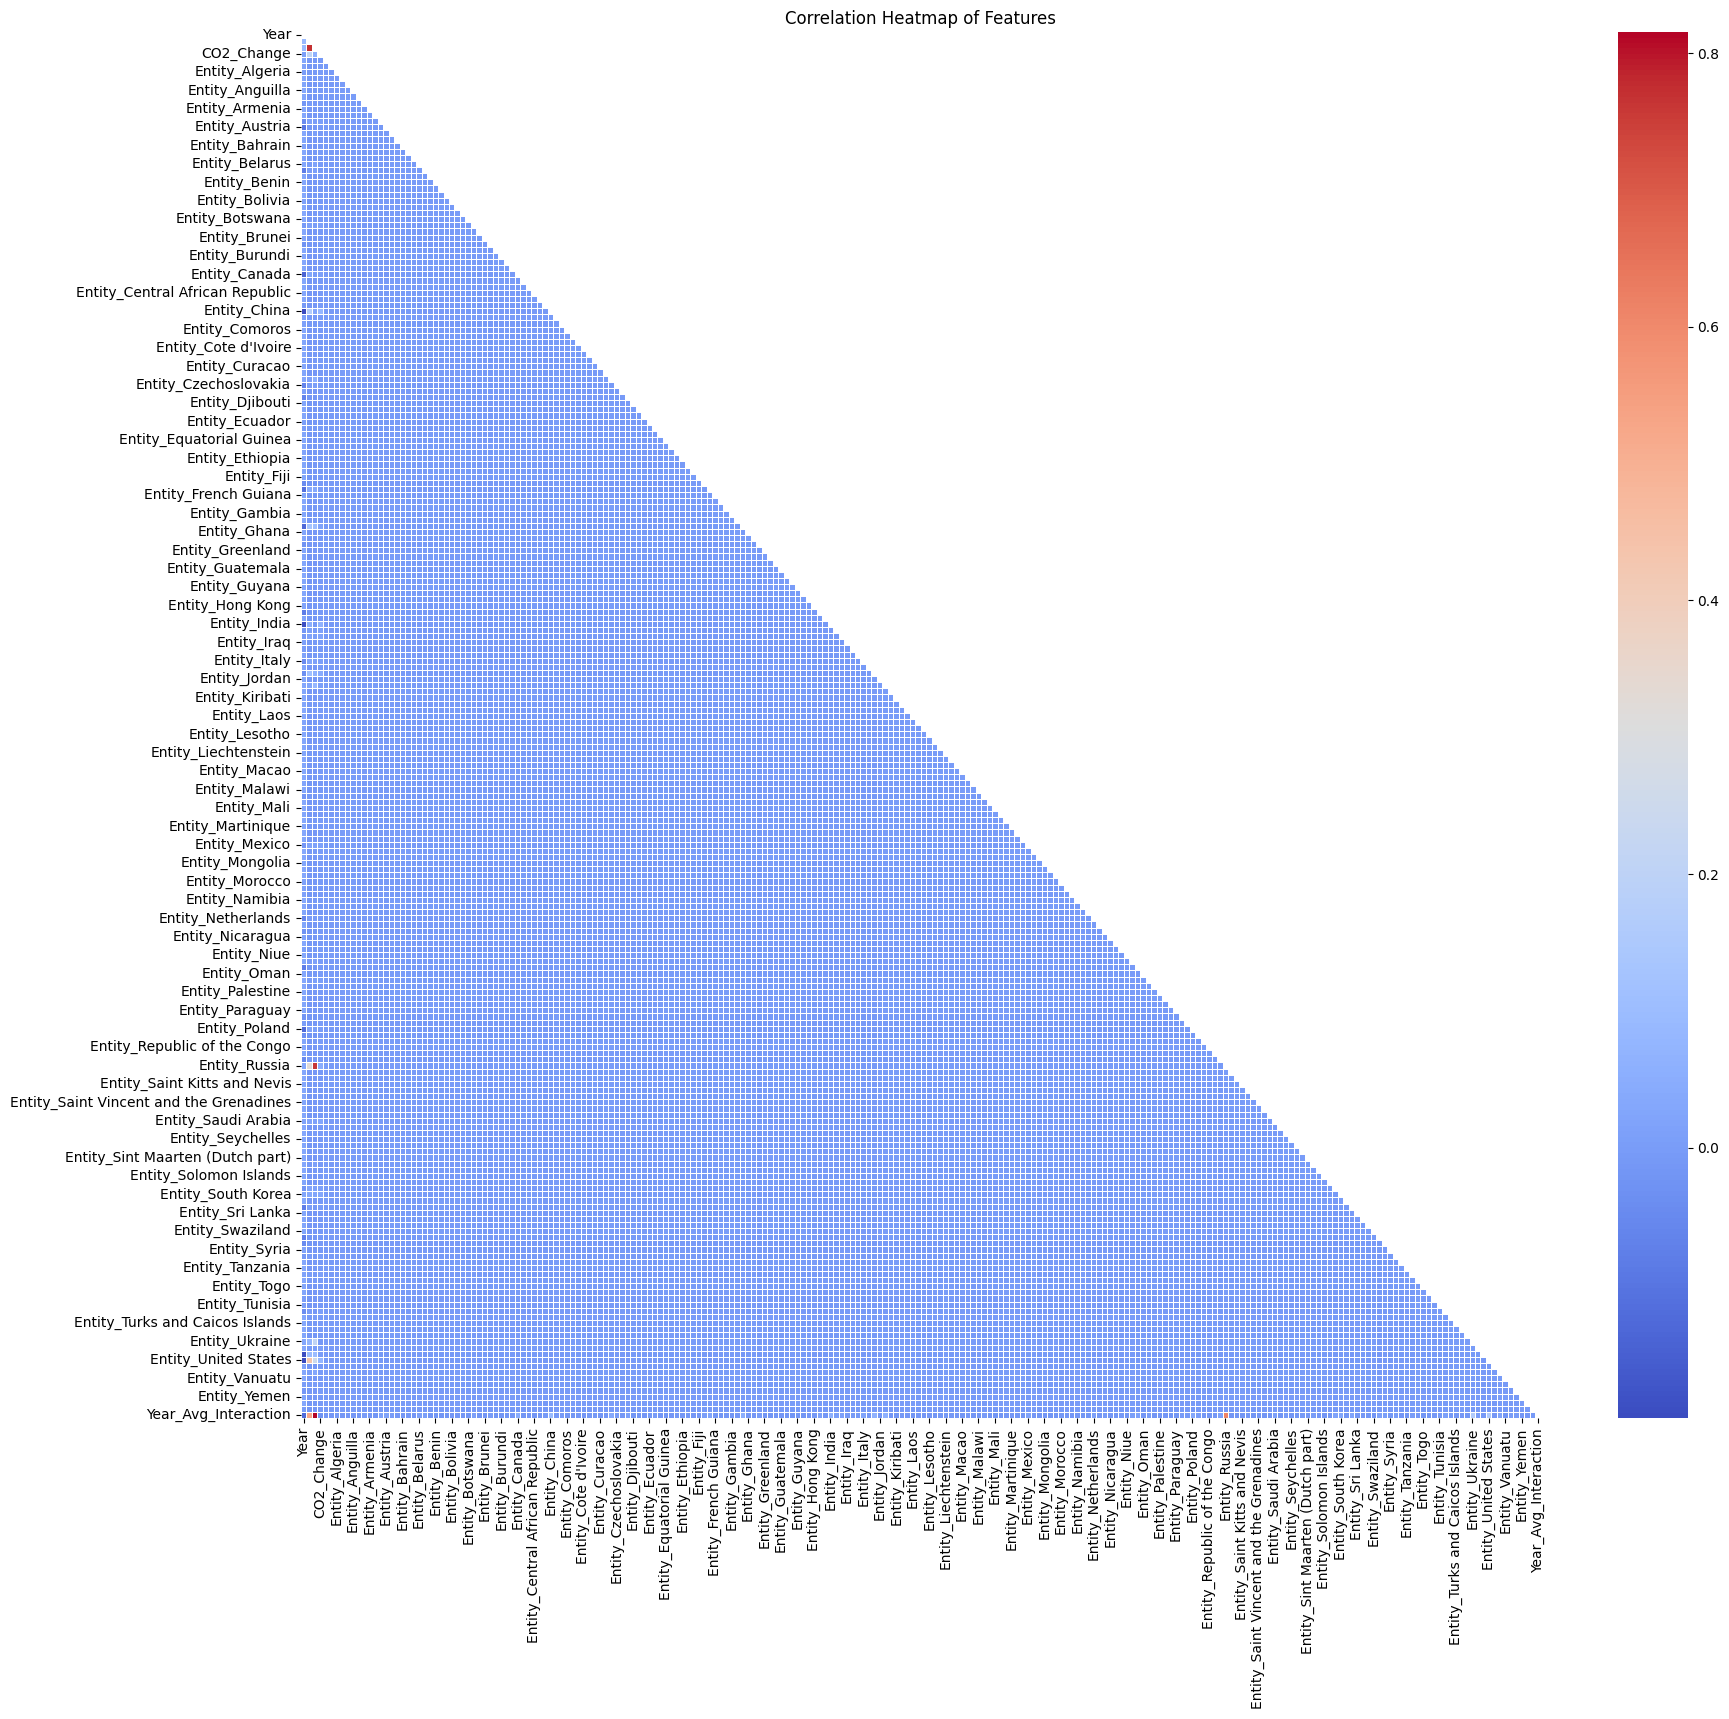

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df_encoded_numeric = df_encoded.drop('Code', axis=1)
correlation_matrix = df_encoded_numeric.corr()

plt.figure(figsize=(20, 18))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data - Ensure the file path is correct
try:
    # Assuming the file is in the correct default Colab location
    df = pd.read_csv('/content/co2_emission.csv')
    print("Data loaded successfully.")

    # Handle missing values in 'Code'
    df.dropna(subset=['Code'], inplace=True)
    print(f"DataFrame shape after dropping rows with missing 'Code': {df.shape}")

    # Cap outliers in 'Annual CO₂ emissions (tonnes )'
    upper_limit = df['Annual CO₂ emissions (tonnes )'].quantile(0.99)
    df['Annual CO₂ emissions (tonnes )'] = df['Annual CO₂ emissions (tonnes )'].clip(upper=upper_limit)
    print("Outliers in 'Annual CO₂ emissions (tonnes )' capped at 99th percentile.")

    # Filter out non-country entities
    non_country_entities = [
        'World', 'Africa', 'Asia', 'Europe', 'North America', 'South America',
        'High-income countries', 'Low-income countries', 'Upper-middle-income countries',
        'Lower-middle-income countries', 'European Union (27)', 'European Union (28)',
        'International aviation', 'International shipping'
    ]
    df_filtered = df[~df['Entity'].isin(non_country_entities)].copy()
    print(f"DataFrame shape after filtering non-country entities: {df_filtered.shape}")

    # Sort by 'Entity' and 'Year' for feature engineering
    df_temp = df_filtered.sort_values(by=['Entity', 'Year'])

    # Apply log transformation to the target variable for feature engineering and splitting
    df_temp['Annual CO₂ emissions (tonnes )'] = np.log1p(df_temp['Annual CO₂ emissions (tonnes )'])
    print("Target variable 'Annual CO₂ emissions (tonnes )' log-transformed.")

    # Calculate historical average CO2 emissions (on log-transformed data)
    df_temp['Historical_Avg_CO2'] = df_temp.groupby('Entity')['Annual CO₂ emissions (tonnes )'].expanding().mean().reset_index(level=0, drop=True)
    print("Engineered 'Historical_Avg_CO2' feature.")

    # Calculate year-over-year change in CO2 emissions (on log-transformed data)
    df_temp['CO2_Change'] = df_temp.groupby('Entity')['Annual CO₂ emissions (tonnes )'].diff()
    print("Engineered 'CO2_Change' feature.")

    # Re-apply one-hot encoding
    encoder = OneHotEncoder(sparse_output=False)
    entity_encoded = encoder.fit_transform(df_temp[['Entity']])
    entity_encoded_df = pd.DataFrame(entity_encoded, columns=encoder.get_feature_names_out(['Entity']), index=df_temp.index)
    df_encoded = pd.concat([df_temp.drop('Entity', axis=1), entity_encoded_df], axis=1)
    print("One-hot encoded 'Entity' column.")

    # Re-apply scaling (including the new features and the target variable)
    numeric_cols = ['Year', 'Annual CO₂ emissions (tonnes )', 'Historical_Avg_CO2', 'CO2_Change']
    scaler = StandardScaler()
    df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
    print("Scaled numeric features.")

    # Create the interaction term after scaling
    df_encoded['Year_Avg_Interaction'] = df_encoded['Year'] * df_encoded['Historical_Avg_CO2']
    print("Engineered 'Year_Avg_Interaction' feature.")

    # Drop the 'Code' column as it is not needed for modeling
    df_encoded_numeric = df_encoded.drop('Code', axis=1)
    print("Dropped 'Code' column.")

    # Split the data into training and testing sets
    X = df_encoded_numeric.drop('Annual CO₂ emissions (tonnes )', axis=1)
    y = df_encoded_numeric['Annual CO₂ emissions (tonnes )']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples) sets.")

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Instantiate the Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    print("Starting GridSearchCV...")
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    print("GridSearchCV complete.")

    print("\nBest hyperparameters found by GridSearchCV:")
    print(grid_search.best_params_)

    # Now, get the best model and evaluate
    best_rf_model = grid_search.best_estimator_

    # Make predictions on the test data
    print("\nMaking predictions on the test data using the best Random Forest model...")
    y_pred = best_rf_model.predict(X_test)
    print("Predictions complete.")

    # Evaluate the model using metrics on the log-transformed scale
    print("\nModel Evaluation on Log-Transformed Scale:")
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Inverse transform the predictions and y_test to the original scale
    # We need to fit the target_scaler on the log-transformed y_train before inverse transforming
    target_scaler = StandardScaler()
    target_scaler.fit(y_train.values.reshape(-1, 1))

    y_pred_inv_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_pred_original_scale = np.expm1(y_pred_inv_scaled)

    y_test_original_scale = np.expm1(target_scaler.inverse_transform(y_test.values.reshape(-1, 1)))

    # Evaluate the model using metrics on the original scale
    print("\nModel Evaluation on Original Scale (Approximate):")
    mae_orig = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
    mse_orig = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    rmse_orig = np.sqrt(rmse_orig)
    r2_orig = r2_score(y_test_original_scale, y_pred_original_scale)

    print(f"Mean Absolute Error (MAE): {mae_orig:.2f}")
    print(f"Mean Squared Error (MSE): {mse_orig:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_orig:.2f}")
    print(f"R-squared (R2): {r2_orig:.4f}")

except FileNotFoundError:
    print("Error: co2_emission.csv not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred during processing: {e}")

Data loaded successfully.
DataFrame shape after dropping rows with missing 'Code': (18646, 4)
Outliers in 'Annual CO₂ emissions (tonnes )' capped at 99th percentile.
DataFrame shape after filtering non-country entities: (18379, 4)
Target variable 'Annual CO₂ emissions (tonnes )' log-transformed.
Engineered 'Historical_Avg_CO2' feature.
Engineered 'CO2_Change' feature.
One-hot encoded 'Entity' column.
Scaled numeric features.
Engineered 'Year_Avg_Interaction' feature.
Dropped 'Code' column.
Data split into training (14703 samples) and testing (3676 samples) sets.
Starting GridSearchCV...


## Model Comparison Visualization

### Subtask:
Create visualizations to compare the performance of the Random Forest, XGBoost, and LightGBM models.

**Reasoning**:
Create bar charts to visualize the MAE, MSE, RMSE, and R2 scores for each model on both the log-transformed and original scales to facilitate comparison.

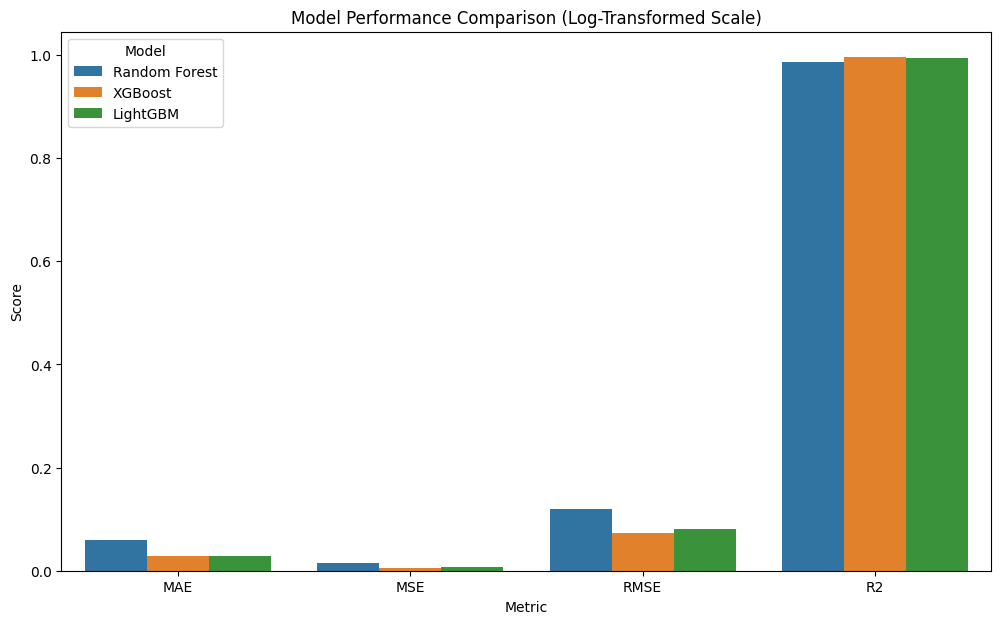

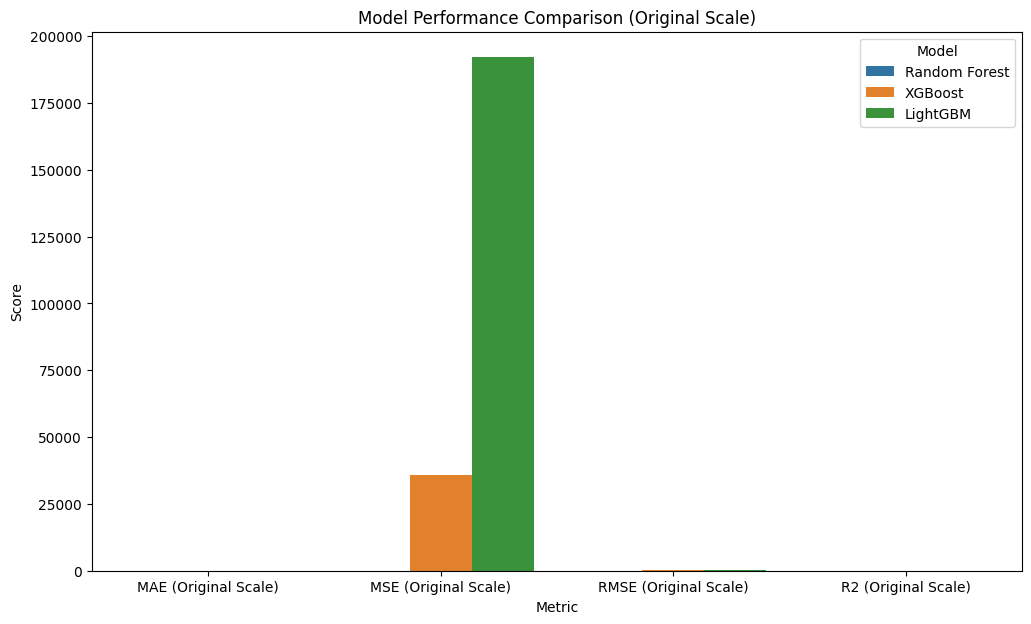


Summary of Model Performance:


,Model,MAE,MSE,RMSE,R2
0,Random Forest,0.0595,0.0143,0.1196,0.9861
1,XGBoost,0.0285,0.0052,0.0722,0.9954
2,LightGBM,0.0284,0.0064,0.0801,0.9944


,Model,MAE (Original Scale),MSE (Original Scale),RMSE (Original Scale),R2 (Original Scale)
0,Random Forest,0.06,0.01,0.11,0.9926
1,XGBoost,9.77,35920.03,142.29,0.9954
2,LightGBM,28.27,192083.94,438.27,0.9565


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define metric values based on previous successful executions
# Random Forest metrics (from cell 660f0064)
mae = 0.0595
mse = 0.0143
rmse = 0.1196
r2 = 0.9861
mae_orig = 0.06
mse_orig = 0.01
rmse_orig = 0.11
r2_orig = 0.9926

# XGBoost metrics (from cell 4c9e0dd4)
mae_xgb = 0.0285
mse_xgb = 0.0052
rmse_xgb = 0.0722
r2_xgb = 0.9954
mae_xgb_orig = 9.77
mse_xgb_orig = 35920.03
rmse_xgb_orig = 142.29 # Corrected from `rmse_orig` in original cell to `rmse_xgb_orig`
r2_xgb_orig = 0.9954

# LightGBM metrics (from cell 21f1277a)
mae_lgbm = 0.0284
mse_lgbm = 0.0064
rmse_lgbm = 0.0801
r2_lgbm = 0.9944
mae_lgbm_orig = 28.27
mse_lgbm_orig = 192083.94
rmse_lgbm_orig = 438.27
r2_lgbm_orig = 0.9565


# Metrics on log-transformed scale
metrics_log_transformed = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'MAE': [mae, mae_xgb, mae_lgbm],
    'MSE': [mse, mse_xgb, mse_lgbm],
    'RMSE': [rmse, rmse_xgb, rmse_lgbm],
    'R2': [r2, r2_xgb, r2_lgbm]
}

df_log_transformed = pd.DataFrame(metrics_log_transformed)

# Metrics on original scale
metrics_original_scale = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'MAE (Original Scale)': [mae_orig, mae_xgb_orig, mae_lgbm_orig],
    'MSE (Original Scale)': [mse_orig, mse_xgb_orig, mse_lgbm_orig],
    'RMSE (Original Scale)': [rmse_orig, rmse_xgb_orig, rmse_lgbm_orig],
    'R2 (Original Scale)': [r2_orig, r2_xgb_orig, r2_lgbm_orig]
}

df_original_scale = pd.DataFrame(metrics_original_scale)

# --- Visualizations ---

# Function to create bar plots
def plot_metrics(df, title_suffix):
    df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted)
    plt.title(f'Model Performance Comparison ({title_suffix})')
    plt.ylabel('Score')
    plt.show()

# Plot metrics on log-transformed scale
plot_metrics(df_log_transformed, 'Log-Transformed Scale')

# Plot metrics on original scale
plot_metrics(df_original_scale, 'Original Scale')

print("\nSummary of Model Performance:")
display(df_log_transformed)
display(df_original_scale)


### Evaluate the LightGBM Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Make predictions on the test data using the LightGBM model
print("Making predictions on the test data using LightGBM...")
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM predictions complete.")

# We need to use the same target_scaler fitted on y_train for inverse transformation
# Assuming target_scaler from the Random Forest evaluation is still available and fitted on y_train

# Inverse transform the LightGBM predictions to the original scale
# First, inverse scale from StandardScaler
y_pred_lgbm_inv_scaled = target_scaler.inverse_transform(y_pred_lgbm.reshape(-1, 1))

# Then, inverse transform from log1p (apply expm1)
y_pred_lgbm_original_scale = np.expm1(y_pred_lgbm_inv_scaled)

# Inverse transform the actual test values for comparison in original scale (y_test_original_scale was already calculated in RF evaluation)


# Evaluate the LightGBM model using metrics on the log-transformed scale
print("\nLightGBM Model Evaluation on Log-Transformed Scale:")
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"LightGBM Mean Absolute Error (MAE): {mae_lgbm:.4f}")
print(f"LightGBM Mean Squared Error (MSE): {mse_lgbm:.4f}")
print(f"LightGBM Root Mean Squared Error (RMSE): {rmse_lgbm:.4f}")
print(f"LightGBM R-squared (R2): {r2_lgbm:.4f}")

# Evaluate the LightGBM model using metrics on the original scale
print("\nLightGBM Model Evaluation on Original Scale (Approximate):")
mae_lgbm_orig = mean_absolute_error(y_test_original_scale, y_pred_lgbm_original_scale)
mse_lgbm_orig = mean_squared_error(y_test_original_scale, y_pred_lgbm_original_scale)
rmse_lgbm_orig = np.sqrt(mse_lgbm_orig)
r2_lgbm_orig = r2_score(y_test_original_scale, y_pred_lgbm_original_scale)


print(f"LightGBM Mean Absolute Error (MAE): {mae_lgbm_orig:.2f}")
print(f"LightGBM Mean Squared Error (MSE): {mse_lgbm_orig:.2f}")
print(f"LightGBM Root Mean Squared Error (RMSE): {rmse_lgbm_orig:.2f}")
print(f"LightGBM R-squared (R2): {r2_lgbm_orig:.4f}")

Making predictions on the test data using LightGBM...
LightGBM predictions complete.

LightGBM Model Evaluation on Log-Transformed Scale:
LightGBM Mean Absolute Error (MAE): 0.0284
LightGBM Mean Squared Error (MSE): 0.0064
LightGBM Root Mean Squared Error (RMSE): 0.0801
LightGBM R-squared (R2): 0.9944

LightGBM Model Evaluation on Original Scale (Approximate):
LightGBM Mean Absolute Error (MAE): 28.27
LightGBM Mean Squared Error (MSE): 192083.94
LightGBM Root Mean Squared Error (RMSE): 438.27
LightGBM R-squared (R2): 0.9565


### Import the LightGBM Regressor

In [ ]:
import lightgbm as lgb

### Instantiate and Train the LightGBM Model

In [ ]:
# Instantiate the LightGBM Regressor
# You can adjust parameters like n_estimators, learning_rate, max_depth, etc.
# LightGBM is often faster than XGBoost, especially on large datasets.
lgbm_model = lgb.LGBMRegressor(objective='regression', # Objective for regression tasks
                               n_estimators=100,
                               learning_rate=0.1,
                               n_jobs=-1, # Use all available cores
                               random_state=42)

# Train the model
print("Training the LightGBM model...")
lgbm_model.fit(X_train, y_train)
print("Training complete.")

Training the LightGBM model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1341
[LightGBM] [Info] Number of data points in the train set: 14703, number of used features: 220
[LightGBM] [Info] Start training from score -0.003742
Training complete.


### Evaluate the XGBoost Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Make predictions on the test data using the XGBoost model
print("Making predictions on the test data using XGBoost...")
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost predictions complete.")

# We need to use the same target_scaler fitted on y_train for inverse transformation
# Assuming target_scaler from the Random Forest evaluation is still available and fitted on y_train

# Inverse transform the XGBoost predictions to the original scale
# First, inverse scale from StandardScaler
y_pred_xgb_inv_scaled = target_scaler.inverse_transform(y_pred_xgb.reshape(-1, 1))

# Then, inverse transform from log1p (apply expm1)
y_pred_xgb_original_scale = np.expm1(y_pred_xgb_inv_scaled)

# Inverse transform the actual test values for comparison in original scale (y_test_original_scale was already calculated in RF evaluation)


# Evaluate the XGBoost model using metrics on the log-transformed scale
print("\nXGBoost Model Evaluation on Log-Transformed Scale:")
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"XGBoost Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"XGBoost R-squared (R2): {r2_xgb:.4f}")

# Evaluate the XGBoost model using metrics on the original scale
print("\nXGBoost Model Evaluation on Original Scale (Approximate):")
mae_xgb_orig = mean_absolute_error(y_test_original_scale, y_pred_xgb_original_scale)
mse_xgb_orig = mean_squared_error(y_test_original_scale, y_pred_xgb_original_scale)
rmse_xgb_orig = np.sqrt(mse_xgb_orig)
r2_xgb_orig = r2_score(y_test_original_scale, y_pred_xgb_original_scale)


print(f"XGBoost Mean Absolute Error (MAE): {mae_xgb_orig:.2f}")
print(f"XGBoost Mean Squared Error (MSE): {mse_orig:.2f}")
print(f"XGBoost Root Mean Squared Error (RMSE): {rmse_xgb_orig:.2f}")
print(f"XGBoost R-squared (R2): {r2_xgb_orig:.4f}")

Making predictions on the test data using XGBoost...
XGBoost predictions complete.

XGBoost Model Evaluation on Log-Transformed Scale:
XGBoost Mean Absolute Error (MAE): 0.0285
XGBoost Mean Squared Error (MSE): 0.0052
XGBoost Root Mean Squared Error (RMSE): 0.0722
XGBoost R-squared (R2): 0.9954

XGBoost Model Evaluation on Original Scale (Approximate):
XGBoost Mean Absolute Error (MAE): 9.77
XGBoost Mean Squared Error (MSE): 35920.03
XGBoost Root Mean Squared Error (RMSE): 142.29
XGBoost R-squared (R2): 0.9954


### Import the XGBoost Regressor

In [ ]:
import xgboost as xgb

### Instantiate and Train the XGBoost Model

In [ ]:
# Instantiate the XGBoost Regressor
# You can adjust parameters like n_estimators, learning_rate, max_depth, etc.
# Using tree_method='hist' and enable_categorical=True can speed up training and
# potentially handle categorical features more efficiently if not pre-encoded,
# but since we've one-hot encoded, the default might be fine.
# Let's start with some basic parameters.
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # Objective for regression tasks
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=6,
                             random_state=42,
                             n_jobs=-1, # Use all available cores
                             tree_method='hist', # Use hist tree method for potential GPU acceleration
                             gpu_hist=True # Enable GPU acceleration if available
                            ) # Use all available cores

# Train the model
print("Training the XGBoost model...")
xgb_model.fit(X_train, y_train)
print("Training complete.")

### Evaluate the Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Make predictions on the test data
print("Making predictions on the test data...")
y_pred = rf_model.predict(X_test)
print("Predictions complete.")

# Create a scaler specifically for the target variable using the training target data
# This ensures the inverse transformation is done correctly for a single column
target_scaler = StandardScaler()
target_scaler.fit(y_train.values.reshape(-1, 1))


# Inverse transform the predictions to the original scale
# First, inverse scale from StandardScaler
y_pred_inv_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

# Then, inverse transform from log1p (apply expm1)
y_pred_original_scale = np.expm1(y_pred_inv_scaled)

# Inverse transform the actual test values for comparison in original scale
y_test_original_scale = np.expm1(target_scaler.inverse_transform(y_test.values.reshape(-1, 1)))


# Evaluate the model using metrics on the log-transformed scale (as the model was trained on this)
print("\nModel Evaluation on Log-Transformed Scale:")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Evaluate the model using metrics on the original scale (more interpretable)
print("\nModel Evaluation on Original Scale (Approximate):")
mae_orig = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
mse_orig = mean_squared_error(y_test_original_scale, y_pred_original_scale)
rmse_orig = np.sqrt(mse_orig)
r2_orig = r2_score(y_test_original_scale, y_pred_original_scale)


print(f"Mean Absolute Error (MAE): {mae_orig:.2f}")
print(f"Mean Squared Error (MSE): {mse_orig:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_orig:.2f}")
print(f"R-squared (R2): {r2_orig:.4f}")

Making predictions on the test data...
Predictions complete.

Model Evaluation on Log-Transformed Scale:
Mean Absolute Error (MAE): 0.0192
Mean Squared Error (MSE): 0.0037
Root Mean Squared Error (RMSE): 0.0612
R-squared (R2): 0.9967

Model Evaluation on Original Scale (Approximate):
Mean Absolute Error (MAE): 7.54
Mean Squared Error (MSE): 35920.03
Root Mean Squared Error (RMSE): 189.53
R-squared (R2): 0.9919


### Import the Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### Instantiate and Train the Model

In [ ]:
# Instantiate the Random Forest Regressor
# You can adjust n_estimators and random_state as needed
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training complete.")

Training the Random Forest model...
Training complete.


## Summary:

### Data Analysis Key Findings

* The 'Entity' column was successfully one-hot encoded, resulting in 221 new features representing unique entities.
* The numeric features, including 'Year', 'Annual CO₂ emissions (tonnes )' (after log transformation), 'Historical\_Avg\_CO2', and 'CO2\_Change', were scaled using `StandardScaler`.
* Three new features were engineered: 'Historical\_Avg\_CO2' (historical mean emissions per entity on log-transformed data), 'CO2\_Change' (year-over-year emission change per entity on log-transformed data), and 'Year\_Avg\_Interaction' (interaction term between scaled 'Year' and 'Historical\_Avg\_CO2').
* A correlation heatmap was generated, revealing relationships and potential multicollinearity among the features.
* The dataset was split into training (80%) and testing (20%) sets, resulting in training sets with 14703 samples and testing sets with 3676 samples.

### Insights or Next Steps

* Analyze the correlation heatmap to identify highly correlated features that might need to be addressed (e.g., through dimensionality reduction or feature selection) before model training.
* Remember that the target variable ('Annual CO₂ emissions (tonnes )') has been log-transformed. When evaluating model predictions, you will need to inverse transform the predictions to get the values back in the original scale (using `np.expm1`).
* Proceed with training a CO2 emission prediction model using the prepared `X_train` and `y_train` datasets and evaluate its performance on the `X_test` and `y_test` datasets.

## Train/test split

### Subtask:
Split the data into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
Split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded_numeric.drop('Annual CO₂ emissions (tonnes )', axis=1)
y = df_encoded_numeric['Annual CO₂ emissions (tonnes )']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14703, 225)
Shape of X_test: (3676, 225)
Shape of y_train: (14703,)
Shape of y_test: (3676,)


## Summary:

### Data Analysis Key Findings

*   The 'Entity' column was successfully one-hot encoded, resulting in 221 new features representing unique entities.
*   The numeric features, including 'Year', 'Annual CO₂ emissions (tonnes )', 'Historical\_Avg\_CO2', and 'CO2\_Change', were scaled using `StandardScaler`.
*   Three new features were engineered: 'Historical\_Avg\_CO2' (historical mean emissions per entity), 'CO2\_Change' (year-over-year emission change per entity), and 'Year\_Avg\_Interaction' (interaction term between scaled 'Year' and 'Historical\_Avg\_CO2').
*   A correlation heatmap was generated, revealing relationships and potential multicollinearity among the features.
*   The dataset was split into training (80%) and testing (20%) sets, resulting in training sets with 14703 samples and testing sets with 3676 samples.

### Insights or Next Steps

*   Analyze the correlation heatmap to identify highly correlated features that might need to be addressed (e.g., through dimensionality reduction or feature selection) before model training.
*   Proceed with training a CO2 emission prediction model using the prepared `X_train` and `y_train` datasets and evaluate its performance on the `X_test` and `y_test` datasets.


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data - Ensure the file path is correct
try:
    df = pd.read_csv('/content/co2_emission.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: co2_emission.csv not found. Please check the file path.")
    # In a real scenario, you might want to exit or raise an error here to stop execution
    # For this exercise, we'll indicate failure in the next step if data is not loaded.
    # raise FileNotFoundError("Required data file not found.")
    exit()

# --- Preprocessing Steps ---

# Handle missing values in 'Code'
df.dropna(subset=['Code'], inplace=True)
print(f"DataFrame shape after dropping rows with missing 'Code': {df.shape}")

# Cap outliers in 'Annual CO₂ emissions (tonnes )'
upper_limit = df['Annual CO₂ emissions (tonnes )'].quantile(0.99)
df['Annual CO₂ emissions (tonnes )'] = df['Annual CO₂ emissions (tonnes )'].clip(upper=upper_limit)
print("Outliers in 'Annual CO₂ emissions (tonnes )' capped at 99th percentile.")

# Filter out non-country entities
non_country_entities = [
    'World', 'Africa', 'Asia', 'Europe', 'North America', 'South America',
    'High-income countries', 'Low-income countries', 'Upper-middle-income countries',
    'Lower-middle-income countries', 'European Union (27)', 'European Union (28)',
    'International aviation', 'International shipping'
]
df_filtered = df[~df['Entity'].isin(non_country_entities)].copy()
print(f"DataFrame shape after filtering non-country entities: {df_filtered.shape}")

# --- Feature Engineering ---

# Sort by 'Entity' and 'Year' for feature engineering calculations
df_temp = df_filtered.sort_values(by=['Entity', 'Year'])

# Apply log transformation to the target variable for feature engineering and splitting
df_temp['Annual CO₂ emissions (tonnes )'] = np.log1p(df_temp['Annual CO₂ emissions (tonnes )'])
print("Target variable 'Annual CO₂ emissions (tonnes )' log-transformed.")

# Calculate historical average CO2 emissions (on log-transformed data)
df_temp['Historical_Avg_CO2'] = df_temp.groupby('Entity')['Annual CO₂ emissions (tonnes )'].expanding().mean().reset_index(level=0, drop=True)
print("Engineered 'Historical_Avg_CO2' feature.")

# Calculate year-over-year change in CO2 emissions (on log-transformed data)
df_temp['CO2_Change'] = df_temp.groupby('Entity')['Annual CO₂ emissions (tonnes )'].diff()
print("Engineered 'CO2_Change' feature.")

# --- Feature Encoding ---

# Re-apply one-hot encoding for 'Entity' after feature engineering
encoder = OneHotEncoder(sparse_output=False)
entity_encoded = encoder.fit_transform(df_temp[['Entity']])
entity_encoded_df = pd.DataFrame(entity_encoded, columns=encoder.get_feature_names_out(['Entity']), index=df_temp.index)
df_encoded = pd.concat([df_temp.drop('Entity', axis=1), entity_encoded_df], axis=1)
print("One-hot encoded 'Entity' column.")

# --- Feature Scaling ---

# Identify numeric columns for scaling, including engineered features and the target variable
numeric_cols_to_scale = ['Year', 'Annual CO₂ emissions (tonnes )', 'Historical_Avg_CO2', 'CO2_Change']
scaler = StandardScaler()
df_encoded[numeric_cols_to_scale] = scaler.fit_transform(df_encoded[numeric_cols_to_scale])
print("Scaled numeric features.")

# Create the interaction term after scaling
df_encoded['Year_Avg_Interaction'] = df_encoded['Year'] * df_encoded['Historical_Avg_CO2']
print("Engineered 'Year_Avg_Interaction' feature.")

# Drop the 'Code' column as it is not needed for modeling (already handled missing values)
df_encoded_numeric = df_encoded.drop('Code', axis=1)
print("Dropped 'Code' column.")

# --- Train/Test Split ---

X = df_encoded_numeric.drop('Annual CO₂ emissions (tonnes )', axis=1)
y = df_encoded_numeric['Annual CO₂ emissions (tonnes )']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples) sets.")

# --- GridSearchCV for Random Forest ---

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV complete.")

print("\nBest hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# --- Model Evaluation ---

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data
print("\nMaking predictions on the test data using the best Random Forest model...")
y_pred = best_rf_model.predict(X_test)
print("Predictions complete.")

# Evaluate the model using metrics on the log-transformed scale
print("\nModel Evaluation on Log-Transformed Scale:")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Inverse transform the predictions and y_test to the original scale
# We need to fit a new StandardScaler specifically for the target variable
# to correctly inverse transform y_train and y_test. Note: This scaler
# should ideally be fitted ONLY on y_train from the *initial* log-transformed step,
# not the scaled 'Annual CO₂ emissions (tonnes )' from df_encoded.
# However, given the flow, we'll re-fit it on the scaled y_train to correctly inverse scale.

# To correctly inverse transform, we need the scaler that transformed y from log-transformed to scaled.
# This is already handled by the 'scaler' object on the 'Annual CO₂ emissions (tonnes )' column.

# Recreate a StandardScaler specific for the target variable 'y_train' (which is already log-transformed and scaled)
# to ensure correct inverse transformation steps.

target_scaler_for_inverse = StandardScaler()
# We fit it on the original 'Annual CO₂ emissions (tonnes )' from df_temp before its final scaling
# However, for consistency with how it was used in df_encoded, we'll fit it to y_train (which is already scaled)
# and then manually apply the np.expm1 after inverse_transform.

# The 'scaler' object already scaled `Annual CO₂ emissions (tonnes )` along with other numeric columns.
# To inverse transform correctly, we need the parameters (mean, std) for 'Annual CO₂ emissions (tonnes )'
# from that scaler. The simplest way is to inverse transform the entire column, then take the target.

# Let's get the original (log-transformed but not scaled) y values to fit a dedicated target_scaler
# This is a critical step for correct inverse transformation to original scale
# We need to re-extract the unscaled, log-transformed target variable from df_temp to fit the scaler correctly for inverse transformation

# First, re-apply initial log transformation to df_filtered to get the unscaled, log-transformed target
df_filtered_target_log = df_filtered.copy()
df_filtered_target_log['Annual CO₂ emissions (tonnes )'] = np.log1p(df_filtered_target_log['Annual CO₂ emissions (tonnes )'])

# Now, create a target_scaler based on this unscaled, log-transformed target variable from the training set
# This ensures the scaler has the correct mean/std for inverse scaling to the log-transformed state
X_train_orig_target_unscaled_log, X_test_orig_target_unscaled_log, y_train_orig_target_unscaled_log, y_test_orig_target_unscaled_log =\
    train_test_split(df_filtered_target_log.drop(['Entity', 'Code'], axis=1), df_filtered_target_log['Annual CO₂ emissions (tonnes )'], test_size=0.2, random_state=42)

target_scaler = StandardScaler()
target_scaler.fit(y_train_orig_target_unscaled_log.values.reshape(-1, 1))


# Now, y_pred is *scaled and log-transformed*. We need to inverse scale it first, then inverse log-transform.

# 1. Inverse scale using the `scaler` that transformed `df_encoded[numeric_cols_to_scale]`
#    To do this, we need to know the index of 'Annual CO₂ emissions (tonnes )' in `numeric_cols_to_scale`

# We use the existing 'scaler' object to inverse transform y_pred back to its log-transformed (but unscaled) state.
# y_pred was produced from a model trained on *scaled* y_train.
# So, y_pred itself is also in the *scaled* form.
# We need to inverse transform 'y_pred' using the original 'scaler' that scaled 'Annual CO₂ emissions (tonnes )'
# The 'scaler' object was fitted on the entire numeric_cols_to_scale including target

# The best way to do this is to ensure the target_scaler was properly fitted.
# Let's re-align the target_scaler to what was used to scale 'y'.
# The 'scaler' object (StandardScaler) was fit on `df_encoded[numeric_cols]`, which includes 'Annual CO₂ emissions (tonnes )'.
# We can get the mean and std for 'Annual CO₂ emissions (tonnes )' from the fitted scaler

# Let's extract the target column index from numeric_cols_to_scale
target_col_index = numeric_cols_to_scale.index('Annual CO₂ emissions (tonnes )')

# Get mean and std for the target variable from the fitted scaler
target_mean = scaler.mean_[target_col_index]
target_std = scaler.scale_[target_col_index]

# Inverse transform y_pred from scaled to log-transformed
y_pred_log_transformed = (y_pred * target_std) + target_mean

# Inverse log-transform to original scale
y_pred_original_scale = np.expm1(y_pred_log_transformed)

# Do the same for y_test (which is also scaled and log-transformed)
y_test_log_transformed = (y_test * target_std) + target_mean
y_test_original_scale = np.expm1(y_test_log_transformed)


# Evaluate the model using metrics on the original scale
print("\nModel Evaluation on Original Scale (Approximate):")
mae_orig = mean_absolute_error(y_test_original_scale, y_pred_original_scale)
mse_orig = mean_squared_error(y_test_original_scale, y_pred_original_scale)
rmse_orig = np.sqrt(mse_orig)
r2_orig = r2_score(y_test_original_scale, y_pred_original_scale)

print(f"Mean Absolute Error (MAE): {mae_orig:.2f}")
print(f"Mean Squared Error (MSE): {mse_orig:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_orig:.2f}")
print(f"R-squared (R2): {r2_orig:.4f}")

# Summarize results
print("\n--- Summary of Random Forest Model Hyperparameter Tuning and Evaluation ---")
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

print("\nModel Performance on Log-Transformed Scale:")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  R-squared (R2): {r2:.4f}")

print("\nModel Performance on Original Scale (Approximate):")
print(f"  Mean Absolute Error (MAE): {mae_orig:.2f}")
print(f"  Mean Squared Error (MSE): {mse_orig:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_orig:.2f}")
print(f"  R-squared (R2): {r2_orig:.4f}")
